In [1]:
from numpy import vstack
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from tqdm import tqdm
from pathlib import Path
import pandas as pd
from PIL import Image, ImageOps
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
dirPath = Path('./')
datasetPath  = Path(dirPath/'data')
noMaskPath  = datasetPath/'1 - without a face mask'
clothMaskPath  = datasetPath/'2 - with a cloth mask'
surgicalMaskPath = datasetPath/'3 - with a surgical mask'
N95MaskPath = datasetPath/'4 - with a N95 mask'
IncorrectMaskPath = datasetPath/'5. - Incorrectly worn Mask'
maskDF = pd.DataFrame()

for imagepath in tqdm(list(noMaskPath .iterdir()), desc='no'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 0
    }, ignore_index=True)
    
for imagepath in tqdm(list(clothMaskPath .iterdir()), desc='cloth'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 1
    }, ignore_index=True)

for imagepath in tqdm(list(N95MaskPath.iterdir()), desc='N95'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 2
    }, ignore_index=True)

for imagepath in tqdm(list(surgicalMaskPath.iterdir()), desc='surgical'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 3
    }, ignore_index=True)


for imagepath in tqdm(list(IncorrectMaskPath.iterdir()), desc='valve'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 4
    }, ignore_index=True)
        

print("Total no. of images:",len(maskDF))
data_frame = datasetPath/'dataset.pickle'
print(f'DataFrame saved successfully: {data_frame}')
maskDF.to_pickle(data_frame)

valve: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 388/388 [00:00<00:00, 1287.31it/s]

Total no. of images: 2055
DataFrame saved successfully: data/dataset.pickle


In [3]:
maskDF

,image,mask
0,data/1 - without a face mask/no_mask (44).png,0.0
1,data/1 - without a face mask/no_mask (126).png,0.0
2,data/1 - without a face mask/no_mask (13).jpg,0.0
3,data/1 - without a face mask/no_mask (13).png,0.0
4,data/1 - without a face mask/no_mask (171).png,0.0
...,...,...
2050,data/5. - Incorrectly worn Mask/maksssksksss53...,4.0
2051,data/5. - Incorrectly worn Mask/maksssksksss52...,4.0
2052,data/5. - Incorrectly worn Mask/maksssksksss24...,4.0
2053,data/5. - Incorrectly worn Mask/maksssksksss73...,4.0


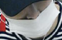

In [4]:
img = Image.open("./data/5. - Incorrectly worn Mask/maksssksksss815.png")
display(img)

In [5]:
img = img.resize((25,25))

In [6]:
gray_image = ImageOps.grayscale(img)
display(gray_image)

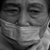

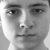

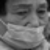

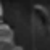

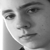

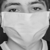

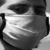

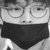

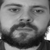

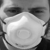

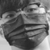

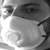

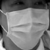

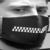

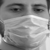

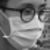

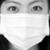

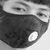

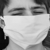

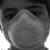

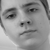

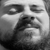

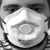

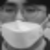

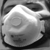

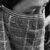

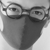

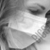

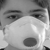

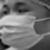

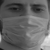

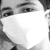

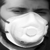

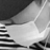

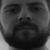

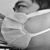

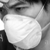

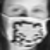

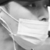

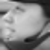

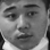

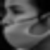

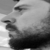

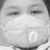

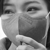

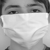

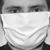

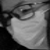

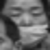

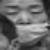

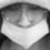

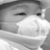

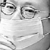

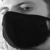

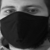

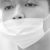

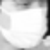

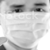

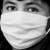

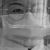

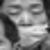

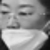

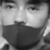

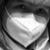

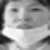

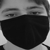

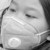

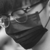

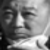

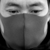

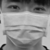

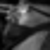

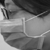

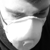

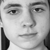

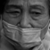

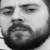

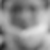

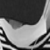

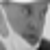

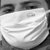

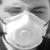

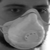

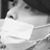

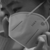

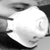

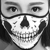

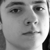

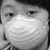

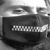

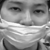

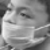

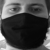

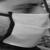

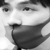

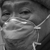

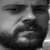

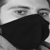

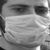

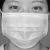

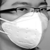

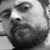

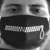

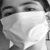

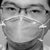

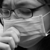

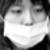

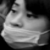

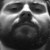

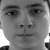

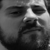

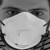

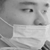

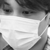

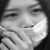

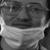

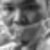

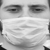

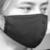

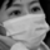

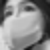

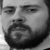

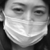

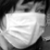

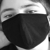

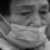

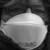

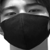

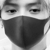

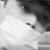

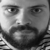

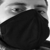

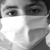

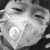

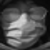

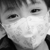

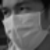

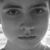

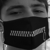

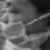

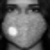

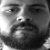

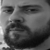

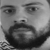

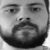

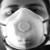

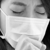

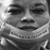

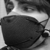

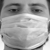

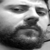

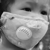

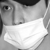

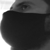

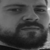

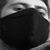

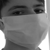

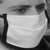

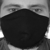

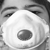

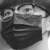

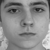

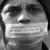

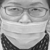

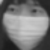

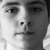

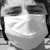

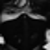

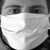

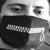

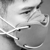

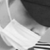

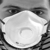

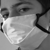

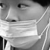

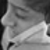

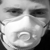

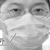

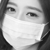

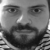

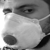

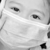

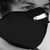

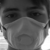

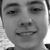

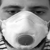

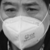

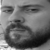

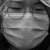

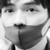

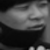

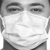

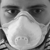

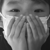

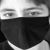

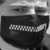

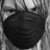

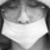

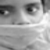

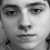

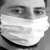

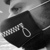

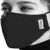

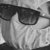

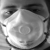

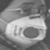

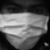

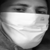

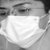

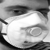

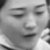

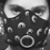

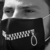

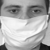

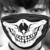

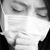

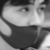

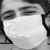

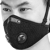

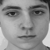

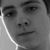

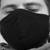

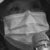

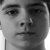

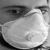

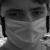

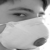

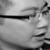

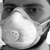

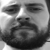

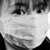

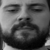

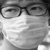

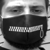

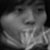

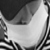

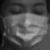

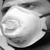

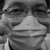

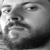

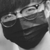

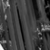

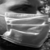

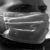

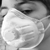

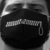

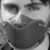

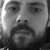

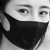

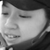

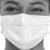

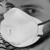

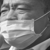

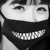

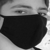

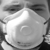

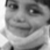

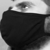

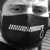

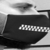

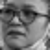

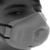

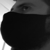

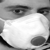

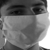

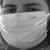

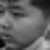

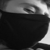

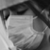

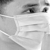

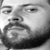

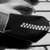

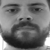

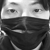

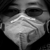

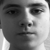

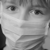

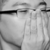

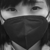

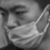

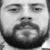

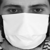

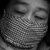

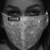

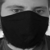

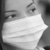

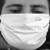

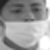

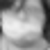

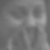

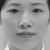

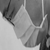

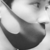

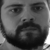

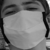

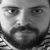

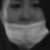

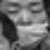

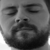

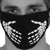

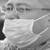

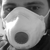

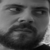

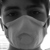

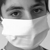

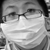

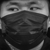

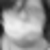

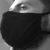

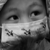

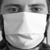

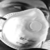

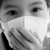

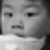

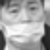

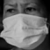

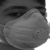

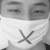

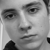

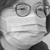

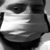

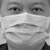

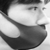

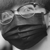

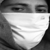

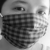

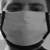

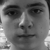

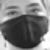

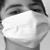

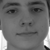

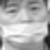

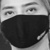

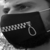

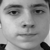

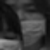

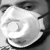

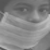

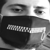

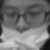

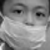

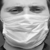

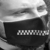

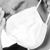

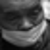

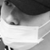

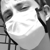

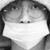

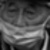

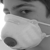

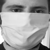

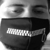

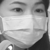

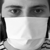

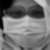

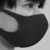

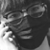

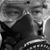

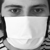

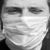

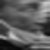

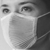

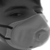

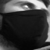

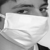

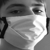

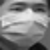

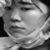

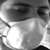

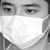

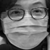

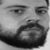

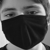

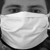

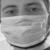

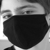

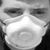

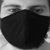

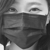

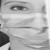

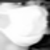

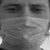

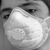

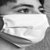

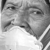

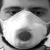

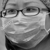

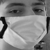

In [7]:
files = glob.glob("./data/5. - Incorrectly worn Mask/*.png")
for file in files:
    img = Image.open(file)
    gray_image = ImageOps.grayscale(img)
    img = gray_image.resize((50,50))
    display(img)

In [8]:
arr = np.array(img)
arr.shape

(50, 50)

In [9]:
y = np.array(maskDF["mask"])
y.shape

(2055,)

In [10]:
x = []
# files = glob.glob("./data/5. - Incorrectly worn Mask/*.png")
for i in range(len(maskDF["image"])):
    print(i)
    img = Image.open(maskDF["image"][i])
    gray_image = ImageOps.grayscale(img)
    img = gray_image.resize((50,50))
    img = np.array(img)
    x.append(img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/Users/jasneetsawhney/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576


In [22]:
type(x)

list